特征：   花萼长度  +  花萼宽度 	预测正确数目： 123 	准确率: 82.00%
特征：   花萼长度  +  花瓣长度 	预测正确数目： 145 	准确率: 96.67%
特征：   花萼长度  +  花瓣宽度 	预测正确数目： 144 	准确率: 96.00%
特征：   花萼宽度  +  花瓣长度 	预测正确数目： 143 	准确率: 95.33%
特征：   花萼宽度  +  花瓣宽度 	预测正确数目： 145 	准确率: 96.67%
特征：   花瓣长度  +  花瓣宽度 	预测正确数目： 147 	准确率: 98.00%


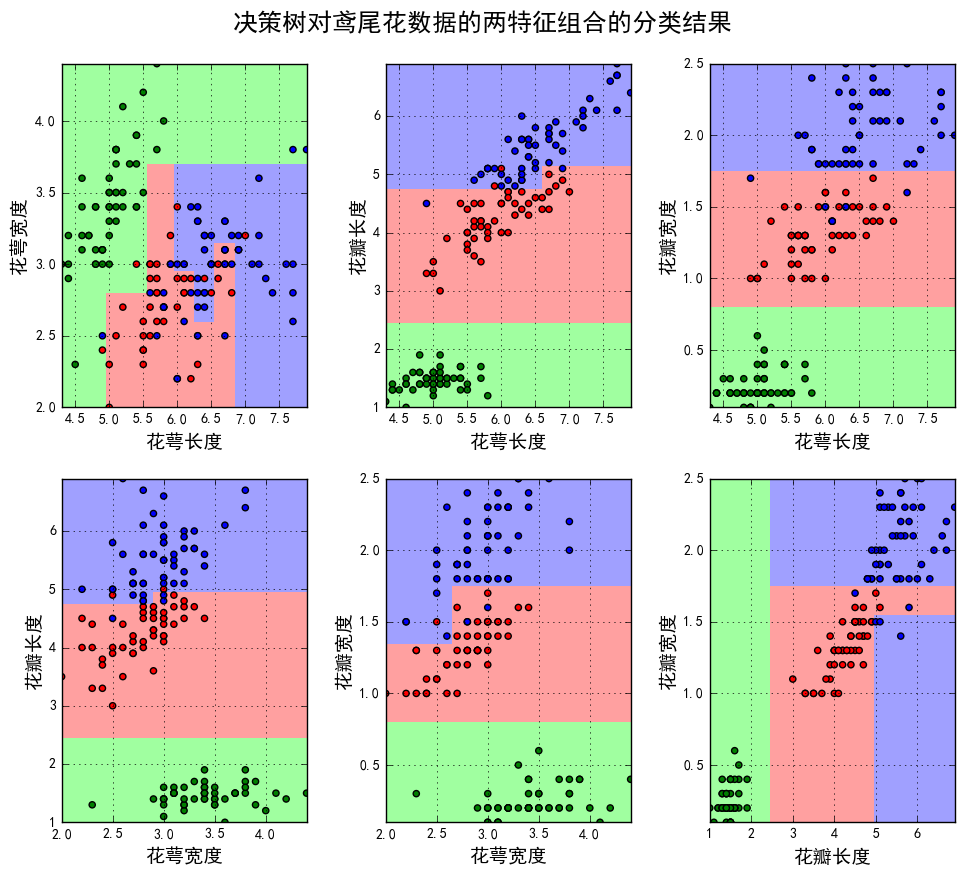

In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier


def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]

# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'


mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

path = '..\\10.Regression\\10.iris.data'  # 数据文件路径
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
x_prime, y = np.split(data, (4,), axis=1)

feature_pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
plt.figure(figsize=(10, 9), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = x_prime[:, pair]

    # 决策树学习
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
    dt_clf = clf.fit(x, y)

    # 画图
    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_hat = dt_clf.predict(x)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)    # 统计预测正确的个数
    print '特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]],
    print '\t预测正确数目：', c,
    print '\t准确率: %.2f%%' % (100 * float(c) / float(len(y)))

    # 显示
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = dt_clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.suptitle(u'决策树对鸢尾花数据的两特征组合的分类结果', fontsize=18)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show()


y_hat = 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1
 2 2 2 2 1 1 1 1 1 1 0 0 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 1 2
 2 1]
y_hat_prob = 
[[ 0.87657528  0.08222018  0.04120455]
 [ 0.70878524  0.25734725  0.0338675 ]
 [ 0.8222077   0.15871946  0.01907284]
 [ 0.79219681  0.1921252   0.01567799]
 [ 0.90597526  0.06249879  0.03152595]
 [ 0.90844245  0.02832542  0.06323213]
 [ 0.88656883  0.09925984  0.01417132]
 [ 0.86083083  0.10452077  0.0346484 ]
 [ 0.72405324  0.26551478  0.01043198]
 [ 0.76113188  0.20697741  0.03189071]
 [ 0.87970948  0.04972353  0.070567  ]
 [ 0.87629535  0.10155572  0.02214893]
 [ 0.7269432   0.24675499  0.02630181]
 [ 0.77039575  0.22151994  0.00808431]
 [ 0.84803539  0.0215066   0.130458  ]
 [ 0.90516407  0.00677707  0.08805886]
 [ 0.90844245  0.02832542  0.06323213]
 [ 0.876

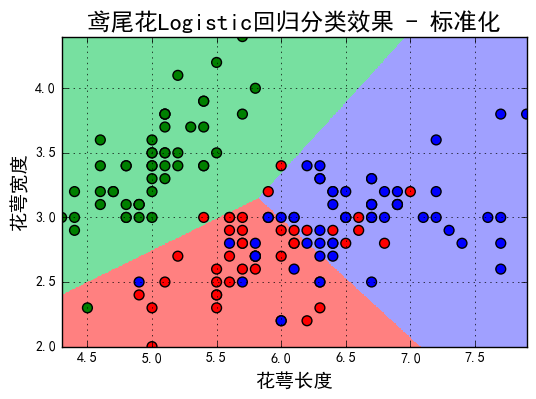

In [11]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

data = pd.read_csv('iris.data', header=None)
iris_types = data[4].unique()
for i, type in enumerate(iris_types):
    data.set_value(data[4] == type, 4, i)
x, y = np.split(data.values, (4,), axis=1)
x = x.astype(np.float)
y = y.astype(np.int)
# print 'x = \n', x
# print 'y = \n', y
# 仅使用前两列特征
x = x[:, :2]
lr = Pipeline([('sc', StandardScaler()),
               ('clf', LogisticRegression()) ])
lr.fit(x, y.ravel())
y_hat = lr.predict(x)
y_hat_prob = lr.predict_proba(x)
np.set_printoptions(suppress=True)
print 'y_hat = \n', y_hat
print 'y_hat_prob = \n', y_hat_prob
print u'准确度：%.2f%%' % (100*np.mean(y_hat == y.ravel()))
# 画图
N, M = 500, 500     # 横纵各采样多少个值
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()   # 第0列的范围
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()   # 第1列的范围
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)                    # 生成网格采样点
x_test = np.stack((x1.flat, x2.flat), axis=1)   # 测试点

# # 无意义，只是为了凑另外两个维度
# x3 = np.ones(x1.size) * np.average(x[:, 2])
# x4 = np.ones(x1.size) * np.average(x[:, 3])
# x_test = np.stack((x1.flat, x2.flat, x3, x4), axis=1)  # 测试点

mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)                  # 预测值
y_hat = y_hat.reshape(x1.shape)                 # 使之与输入的形状相同
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=50, cmap=cm_dark)    # 样本的显示
plt.xlabel(u'花萼长度', fontsize=14)
plt.ylabel(u'花萼宽度', fontsize=14)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.title(u'鸢尾花Logistic回归分类效果 - 标准化', fontsize=17)
plt.show()

[-0.20305058 -0.197458   -0.23939076 -0.17678901 -0.18938752 -0.49315317
 -0.49680876 -0.53439303 -0.56671973 -0.57118783 -0.62298432 -0.74494045
 -0.84195114 -0.86253895 -0.8896612  -0.92031921 -0.910392   -0.96546542
 -1.10741616 -1.05137264 -1.00850569 -0.98273007 -0.92736624 -0.99642109
 -0.98254801 -0.91414257 -0.89135195 -0.84719751 -0.92540724 -0.97984088
 -1.01334015 -0.94818886 -0.98401421 -0.92769799 -0.6953611  -0.63269142
 -0.56834363 -0.54069402 -0.54891601 -0.55386014 -0.52419866 -0.45143427
 -0.37821485 -0.34549016 -0.16897326 -0.15438695 -0.10940954 -0.0912189
 -0.00921003 -0.04928912  0.10214442  0.17703364  0.26399673  0.20671923
  0.40888752  0.41413561  0.38652343  0.5241381   0.59650826  0.64384026
  0.65265613  0.5932377   0.73135444  0.79344021  0.71580785  0.78308389
  0.79535605  0.7923365   0.79977042  0.8641866   0.87369111  0.88069427
  0.82930588  0.96377567  0.97836905  1.01975875  1.05929556  0.95849968
  0.94182823  0.91831719  1.0032604   0.9417691   1.

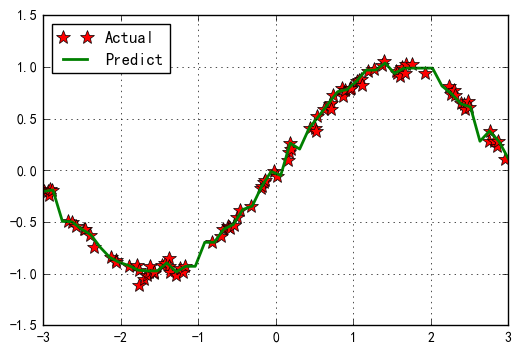

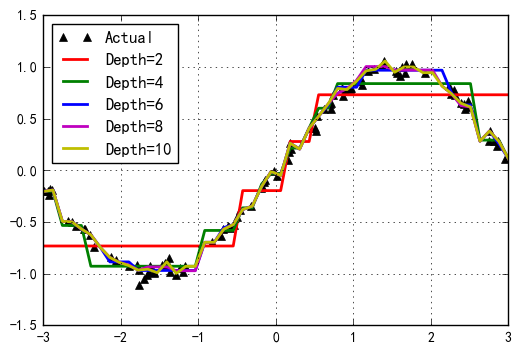

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

N = 100
x = np.random.rand(N) * 6 - 3     # [-3,3)
x.sort()
y = np.sin(x) + np.random.randn(N) * 0.05
print y
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的
print x

reg = DecisionTreeRegressor(criterion='mse', max_depth=9)
dt = reg.fit(x, y)
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
y_hat = dt.predict(x_test)
plt.plot(x, y, 'r*', ms=10, label='Actual')
plt.plot(x_test, y_hat, 'g-', linewidth=2, label='Predict')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# 比较决策树的深度影响
depth = [2, 4, 6, 8, 10]
clr = 'rgbmy'
reg = [DecisionTreeRegressor(criterion='mse', max_depth=depth[0]),
       DecisionTreeRegressor(criterion='mse', max_depth=depth[1]),
       DecisionTreeRegressor(criterion='mse', max_depth=depth[2]),
       DecisionTreeRegressor(criterion='mse', max_depth=depth[3]),
       DecisionTreeRegressor(criterion='mse', max_depth=depth[4])]

plt.plot(x, y, 'k^', linewidth=2, label='Actual')
x_test = np.linspace(-3, 3, 50).reshape(-1, 1)
for i, r in enumerate(reg):
    dt = r.fit(x, y)
    y_hat = dt.predict(x_test)
    plt.plot(x_test, y_hat, '-', color=clr[i], linewidth=2, label='Depth=%d' % depth[i])
plt.legend(loc='upper left')
plt.grid()
plt.show()

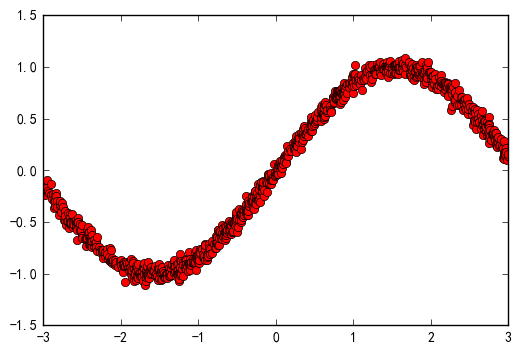

In [47]:
N = 1000
x = np.random.rand(N) * 6 - 3     # [-3,3)
x.sort()
y = np.sin(x) + np.random.randn(N) * 0.05
plt.plot(x,y,'ro')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
model=DecisionTreeRegressor(criterion="mse",max_depth=5)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)
x_train=x_train.reshape([-1,1])
print x_train.shape,y_train.shape
model.fit(x_train,y_train)

(700L, 1L) (700L,)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [49]:
y_pred=model.predict(x_test.reshape([-1,1]))

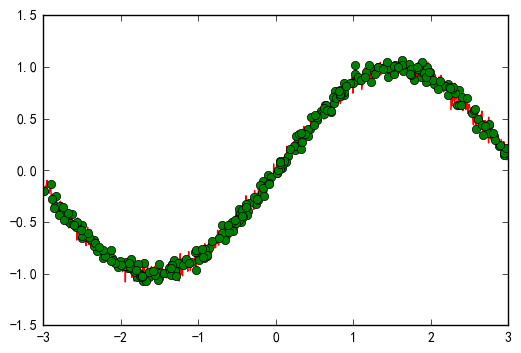

In [50]:
plt.plot(x,y,"r-")
plt.plot(x_test,y_test,"go")
plt.show()

In [71]:
N = 400
x = np.random.rand(N) * 8 - 4     # [-4,4)
x.sort()
# y1 = np.sin(x) + 3 + np.random.randn(N) * 0.1
# y2 = np.cos(0.3*x) + np.random.randn(N) * 0.01
# y1 = np.sin(x) + np.random.randn(N) * 0.05
# y2 = np.cos(x) + np.random.randn(N) * 0.1
y1 = 16 * np.sin(x) ** 3 + np.random.randn(N)
y2 = 13 * np.cos(x) - 5 * np.cos(2*x) - 2 * np.cos(3*x) - np.cos(4*x) + 0.1* np.random.randn(N)
print y1
print y2

[  5.4501263    5.61992714   6.08507039   6.01389557   5.12850476
   5.64218841   8.24860191   7.62322853   6.26111784   5.70468545
   3.8166442    5.56024835   4.63502965   5.66314732   6.3100008
   4.22032486   2.7898905    3.86128701   4.38934716   3.57879923
   3.92054426   3.21981122   1.67354523   2.68015846   2.96842611
   0.9393302    3.45345917   1.34657749   1.44185157   0.06359056
   2.36947713   3.20433692   1.54758325   2.58847707   2.10290035
   1.14501881   0.75182167   0.93191003  -0.16488515   1.17823022
   1.81044662   1.09464911   0.23997005   0.64846734   1.59181104
   0.88841964   0.45420007  -0.85448157  -1.68409603   0.84874126
  -0.64163509   1.23636619   0.31427038   0.01952481  -0.67623409
   0.7852839    0.83456136  -1.48330329  -0.68257255  -0.77725381
  -0.07864629   1.07283308  -0.34740317  -0.02827995  -0.68541849
   0.03643353   0.40522232  -1.35824389  -4.22327868  -0.34486152
   0.05872242  -1.27045491  -1.89099367  -3.16474846  -0.61187442
  -0.295761

In [72]:
y = np.vstack((y1, y2)).T
print y

[[  5.4501263   -9.090475  ]
 [  5.61992714  -9.19053501]
 [  6.08507039  -9.03031136]
 [  6.01389557  -9.12911279]
 [  5.12850476  -9.318414  ]
 [  5.64218841  -9.62703654]
 [  8.24860191  -9.6149669 ]
 [  7.62322853  -9.65435867]
 [  6.26111784  -9.97289638]
 [  5.70468545 -10.0843831 ]
 [  3.8166442   -9.97193917]
 [  5.56024835 -10.48269152]
 [  4.63502965 -10.54326578]
 [  5.66314732 -10.35514501]
 [  6.3100008  -11.03156886]
 [  4.22032486 -11.29410448]
 [  2.7898905  -11.3653869 ]
 [  3.86128701 -11.38933256]
 [  4.38934716 -11.37971827]
 [  3.57879923 -11.86090972]
 [  3.92054426 -11.90130657]
 [  3.21981122 -12.17836718]
 [  1.67354523 -12.1519842 ]
 [  2.68015846 -12.45028533]
 [  2.96842611 -12.47511602]
 [  0.9393302  -12.63114622]
 [  3.45345917 -12.87243866]
 [  1.34657749 -13.16327564]
 [  1.44185157 -13.155893  ]
 [  0.06359056 -13.97104334]
 [  2.36947713 -13.61762418]
 [  3.20433692 -14.01659852]
 [  1.54758325 -14.05806077]
 [  2.58847707 -14.45339452]
 [  2.10290035

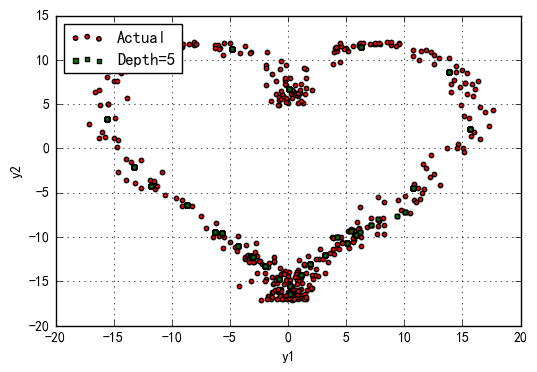

In [73]:
x = x.reshape(-1, 1)  # 转置后，得到N个样本，每个样本都是1维的

deep = 5
reg = DecisionTreeRegressor(criterion='mse', max_depth=deep)
dt = reg.fit(x, y)

x_test = np.linspace(-4, 4, num=1000).reshape(-1, 1)
#print x_test
y_hat = dt.predict(x_test)
#print y_hat
plt.scatter(y[:, 0], y[:, 1], c='r', s=10, label='Actual')
plt.scatter(y_hat[:, 0], y_hat[:, 1], c='g', marker='s', s=10, label='Depth=%d' % deep, alpha=1)
plt.legend(loc='upper left')
plt.xlabel('y1')
plt.ylabel('y2')
plt.grid()
plt.show()

特征：   花萼长度  +  花萼宽度 	预测正确数目： 123 	准确率: 82.00%
特征：   花萼长度  +  花瓣长度 	预测正确数目： 142 	准确率: 94.67%
特征：   花萼长度  +  花瓣宽度 	预测正确数目： 145 	准确率: 96.67%
特征：   花萼宽度  +  花瓣长度 	预测正确数目： 143 	准确率: 95.33%
特征：   花萼宽度  +  花瓣宽度 	预测正确数目： 145 	准确率: 96.67%
特征：   花瓣长度  +  花瓣宽度 	预测正确数目： 145 	准确率: 96.67%


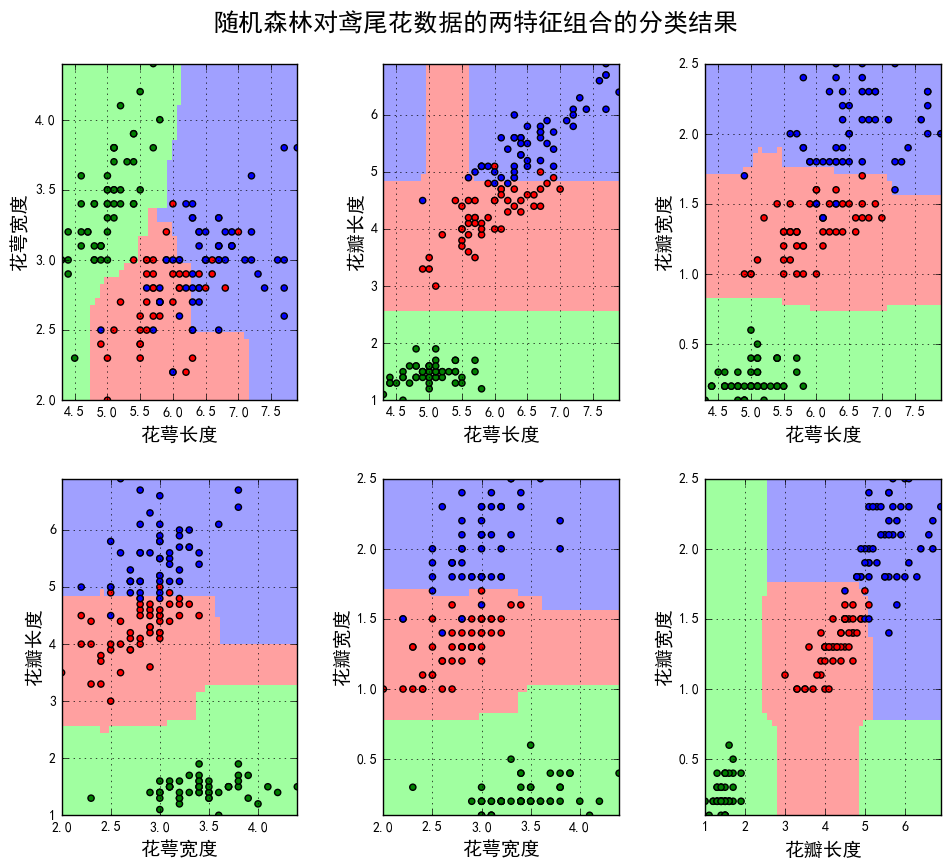

In [81]:
from sklearn.ensemble import RandomForestClassifier
mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

path = '..\\10.Regression\\10.iris.data'  # 数据文件路径
data = np.loadtxt(path, dtype=float, delimiter=',', converters={4: iris_type})
x_prime, y = np.split(data, (4,), axis=1)

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(10, 9), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = x_prime[:, pair]

    # 随机森林
    clf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=3)
    rf_clf = clf.fit(x, y.ravel())

    # 画图
    N, M = 50, 50  # 横纵各采样多少个值
    x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # 第0列的范围
    x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # 第1列的范围
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_hat = rf_clf.predict(x)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)    # 统计预测正确的个数
    print '特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]],
    print '\t预测正确数目：', c,
    print '\t准确率: %.2f%%' % (100 * float(c) / float(len(y)))

    # 显示
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = rf_clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.tight_layout(2.5)
plt.subplots_adjust(top=0.92)
plt.suptitle(u'随机森林对鸢尾花数据的两特征组合的分类结果', fontsize=18)
plt.show()

In [85]:
x.reshape(-1).shape

(300L,)